### 绘制 DOS

In [1]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.io.vasp.outputs import Vasprun, BSVasprun

# 获取态密度数据
dos_vasprun=Vasprun("./dos/vasprun.xml")
dos_data=dos_vasprun.complete_dos

/home/yangsl/src/miniconda3/envs/base_ysl/lib/python3.11/site-packages/pymatgen/io/vasp/outputs.py:1219: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))


In [3]:
# 获取费米能级
fermi = dos_data.efermi
fermi

6.78410678

In [7]:
dos_data.energies

array([-26.5633, -26.5507, -26.5381, ...,  11.222 ,  11.2346,  11.2472])

In [9]:
# 整体能量平移
energy = dos_data.energies - fermi
energy

array([-33.34740678, -33.33480678, -33.32220678, ...,   4.43789322,
         4.45049322,   4.46309322])

In [10]:
dos_plot = DosPlotter()

<Axes: xlabel='Energies (eV)', ylabel='Density of states (states/eV)'>

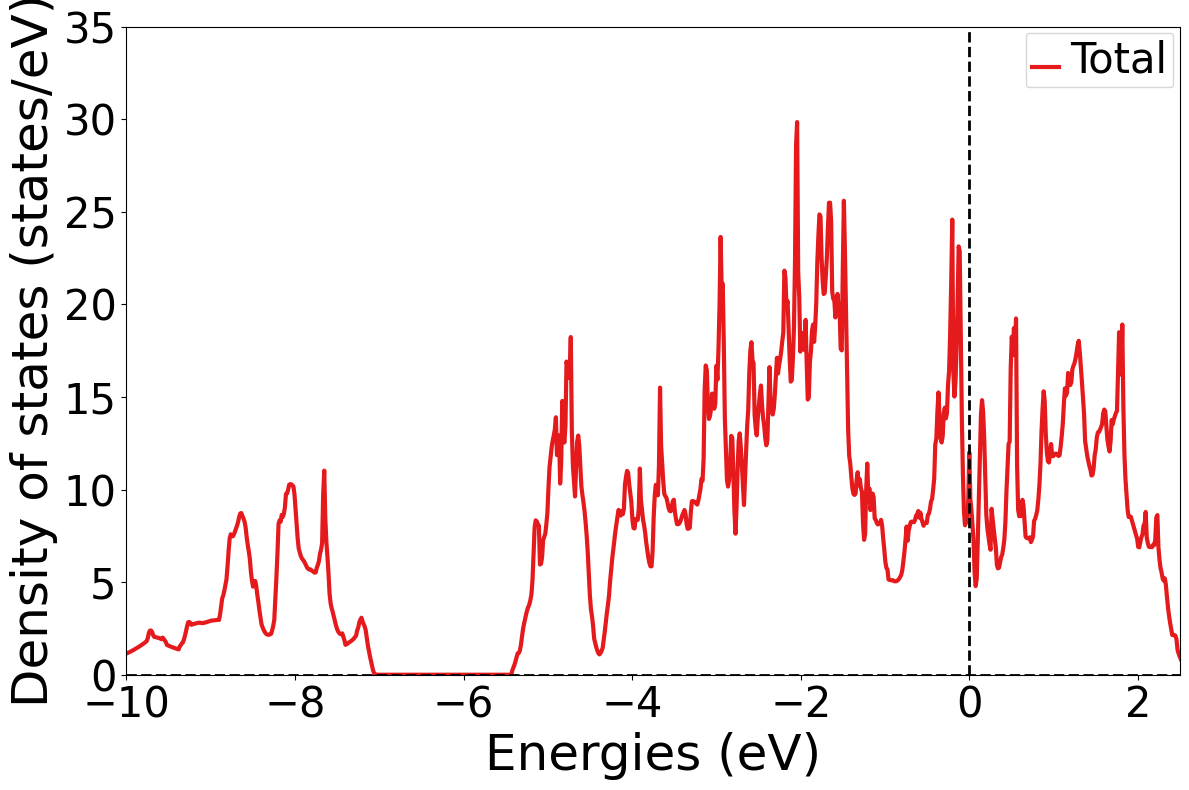

In [ ]:
# 态密度（总）绘制
dos_plot.add_dos("Total", dos=dos_data)
dos_plot.get_plot(
    xlim=(-10, 2.5),
    ylim=(0, 35),
)

<Axes: xlabel='Energies (eV)', ylabel='Density of states (states/eV)'>

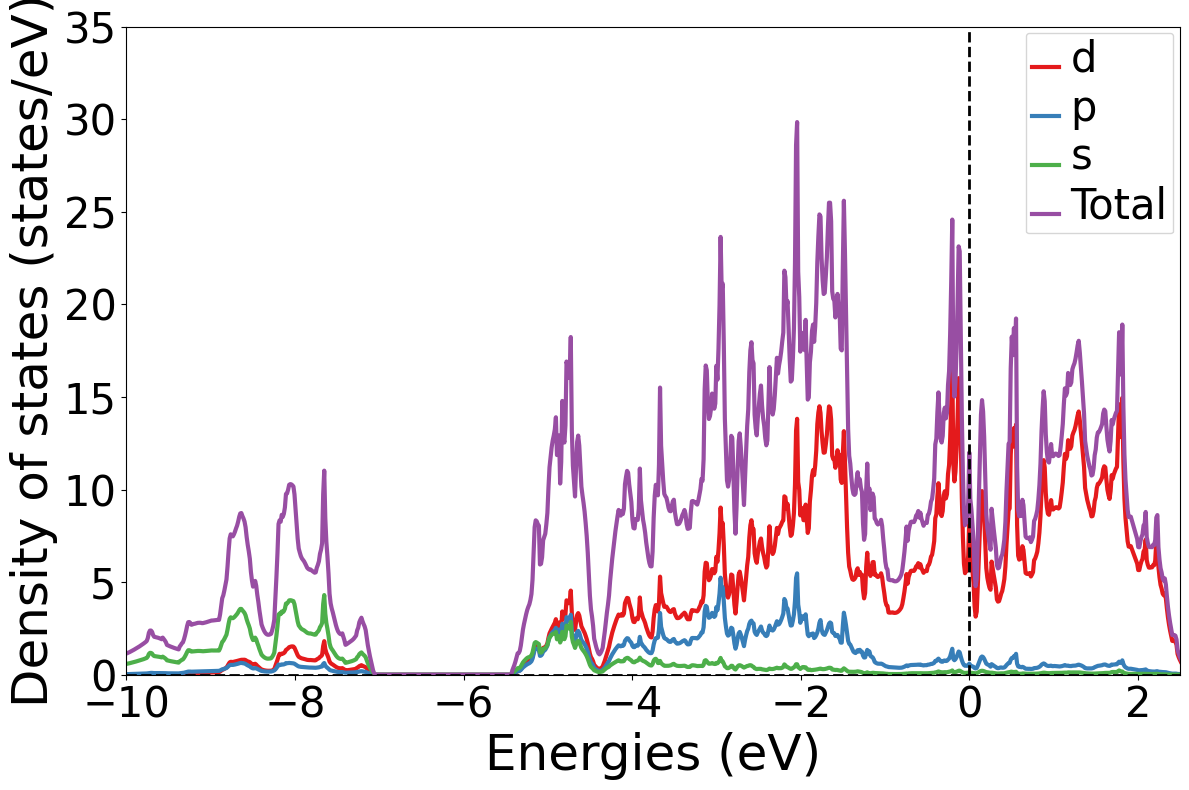

In [ ]:
# 态密度（投影到轨道 + 总）绘制
pdos_plot = DosPlotter()    # sigma=0.05
pdos_plot.add_dos("Total", dos=dos_data)
pdos_plot.add_dos_dict(dos_data.get_spd_dos())
pdos_plot.get_plot(
    xlim=(-10, 2.5),
    ylim=(0, 35),
)

<Axes: xlabel='Energies (eV)', ylabel='Density of states (states/eV)'>

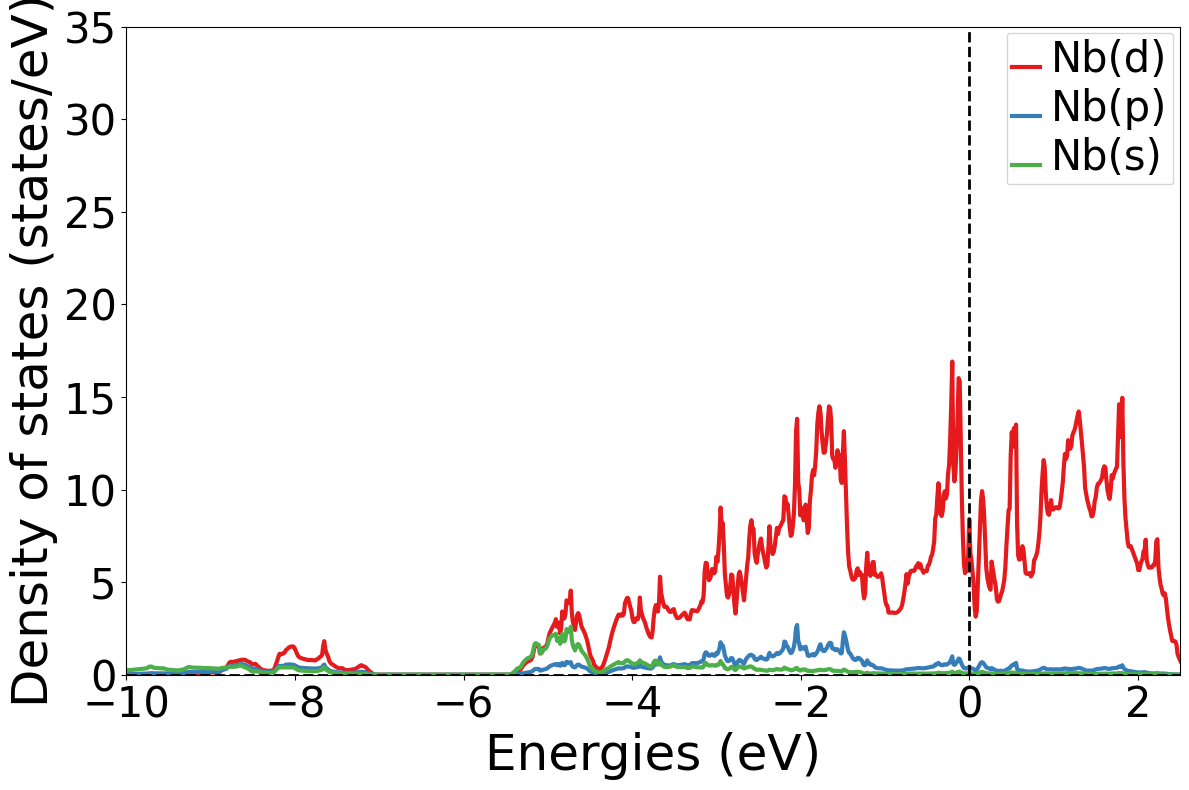

In [27]:
from pymatgen.electronic_structure.core import OrbitalType

# 态密度（元素投影到轨道 + 总）绘制
edos_plot = DosPlotter()
pdos_Nb = dos_data.get_element_spd_dos("Nb")
edos_plot.add_dos("Nb(s)", dos=pdos_Nb[OrbitalType.s])
edos_plot.add_dos("Nb(p)", dos=pdos_Nb[OrbitalType.p])
edos_plot.add_dos("Nb(d)", dos=pdos_Nb[OrbitalType.d])
edos_plot.get_plot(
    xlim=(-10, 2.5),
    ylim=(0, 35),
)

<Axes: xlabel='Energies (eV)', ylabel='Density of states (states/eV)'>

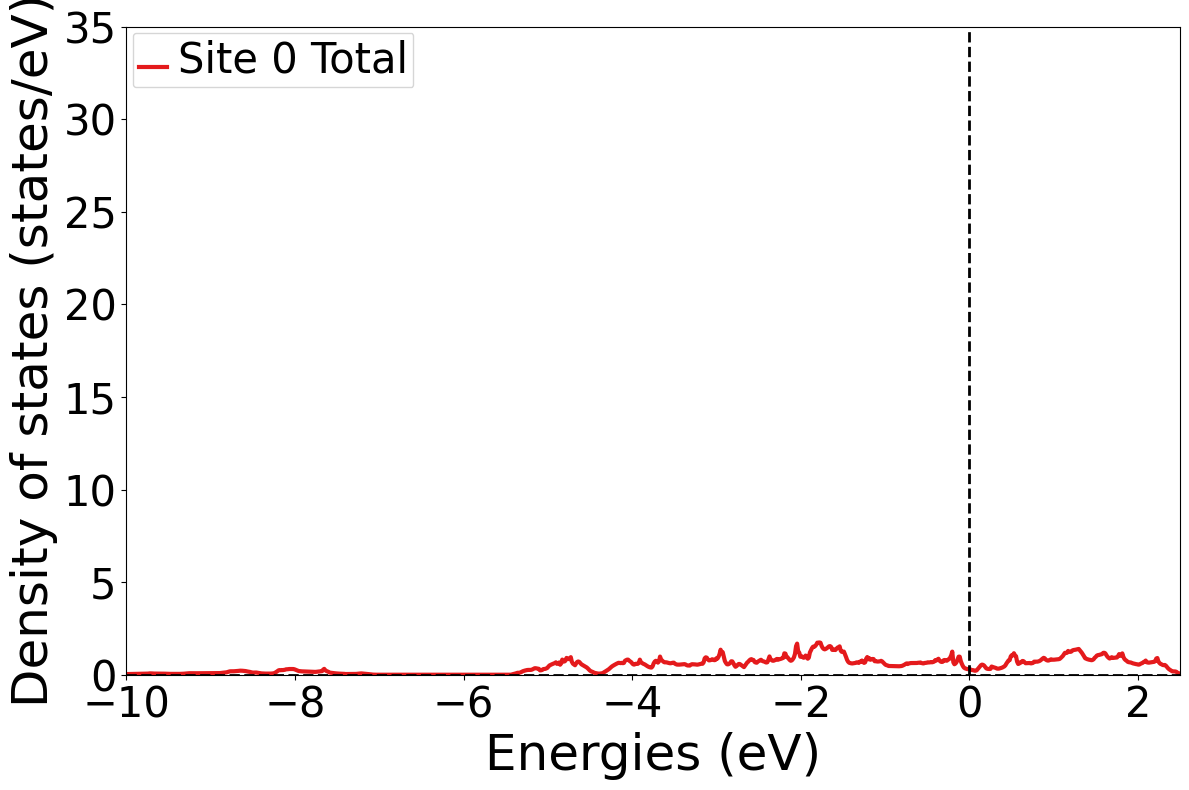

In [ ]:
# 态密度（投影到原子）绘制
structure = dos_vasprun.final_structure

ados_plot = DosPlotter()
ados_plot.add_dos("Site 0 Total", dos=dos_data.get_site_dos(structure[0]))
ados_plot.get_plot(
    xlim=(-10, 2.5),
    ylim=(0, 35),
)

<Axes: xlabel='Energies (eV)', ylabel='Density of states (states/eV)'>

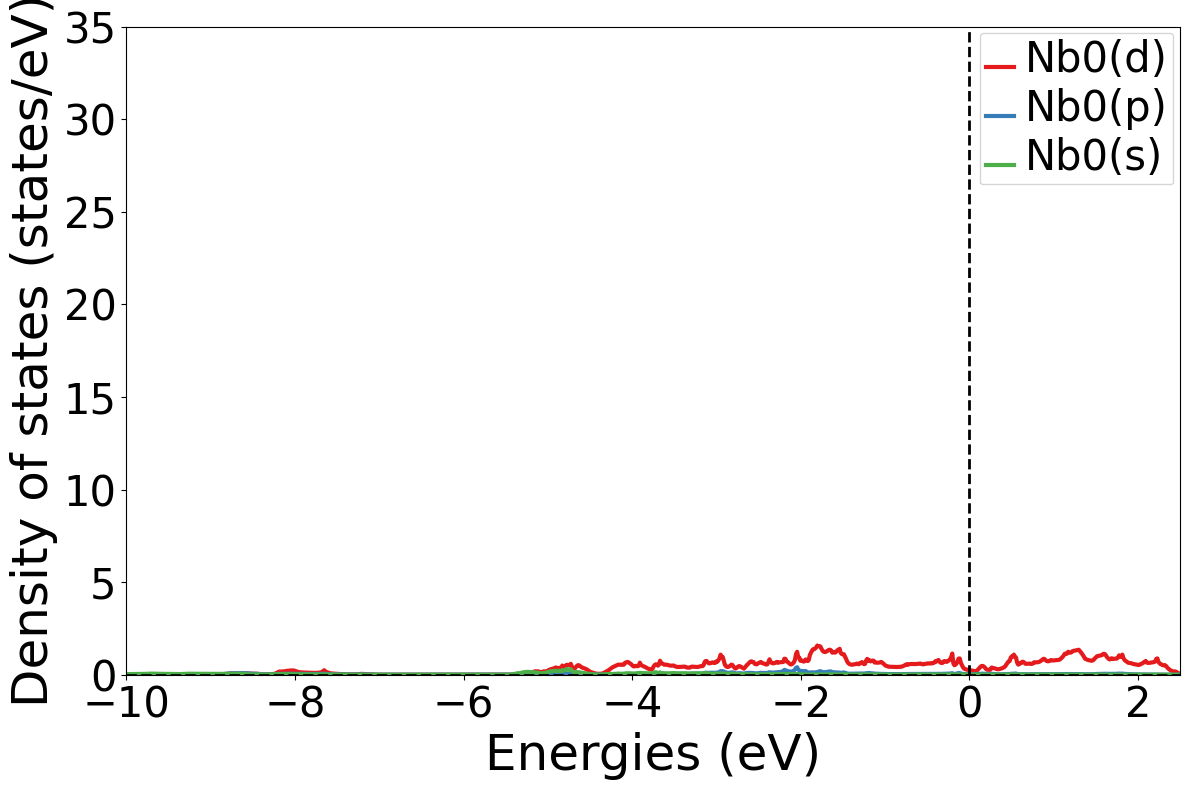

In [ ]:
# 态密度（原子投影到轨道）绘制
apdos_plot = DosPlotter()
dos_site0 = dos_data.get_site_spd_dos(structure[0])
apdos_plot.add_dos("Nb0(s)", dos=dos_site0[OrbitalType.s])
apdos_plot.add_dos("Nb0(p)", dos=dos_site0[OrbitalType.p])
apdos_plot.add_dos("Nb0(d)", dos=dos_site0[OrbitalType.d])
apdos_plot.get_plot(
    xlim=(-10, 2.5),
    ylim=(0, 35),
)